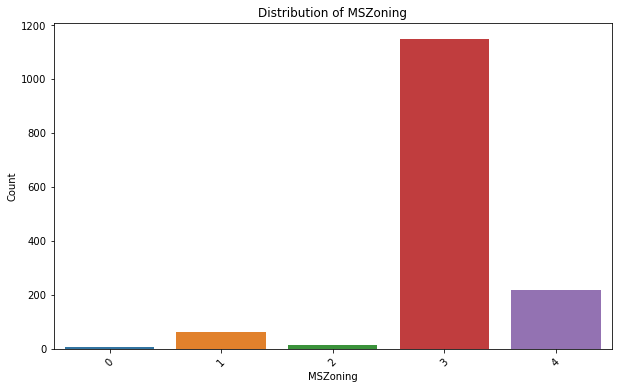

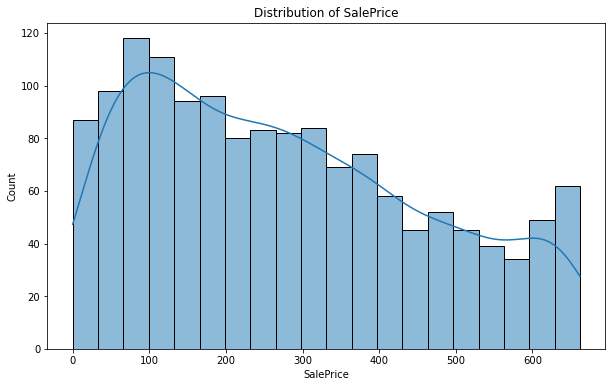

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('train.csv')

# Step 2: Data Preprocessing 
data = data.fillna(0)
data = data.astype(str)
label_encoder = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])

#Analyzing Data

# Plotting bar chart for the 'MSZoning' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='MSZoning', data=data)
plt.title('Distribution of MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting histogram for the 'SalePrice' feature
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], bins=20, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()




Summary Statistics:
  summary                 Id          MSSubClass MSZoning        LotFrontage  \
0   count               1460                1460     1460               1460   
1    mean              730.5  56.897260273972606     None  70.04995836802665   
2  stddev  421.6100093688479   42.30057099381045     None  24.28475177448321   
3     min                  1                  20  C (all)                100   
4     max               1460                 190       RM                 NA   

              LotArea Street Alley LotShape LandContour  ...  \
0                1460   1460  1460     1460        1460  ...   
1  10516.828082191782   None  None     None        None  ...   
2    9981.26493237915   None  None     None        None  ...   
3                1300   Grvl  Grvl      IR1         Bnk  ...   
4              215245   Pave  Pave      Reg         Lvl  ...   

            PoolArea PoolQC  Fence MiscFeature             MiscVal  \
0               1460   1460   1460        14

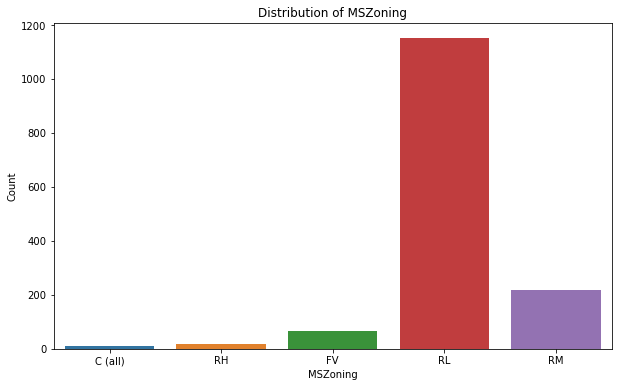

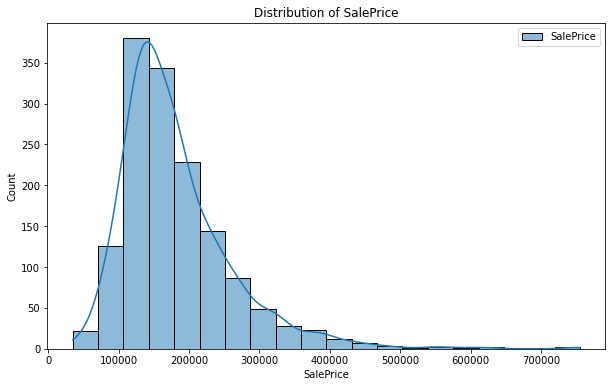

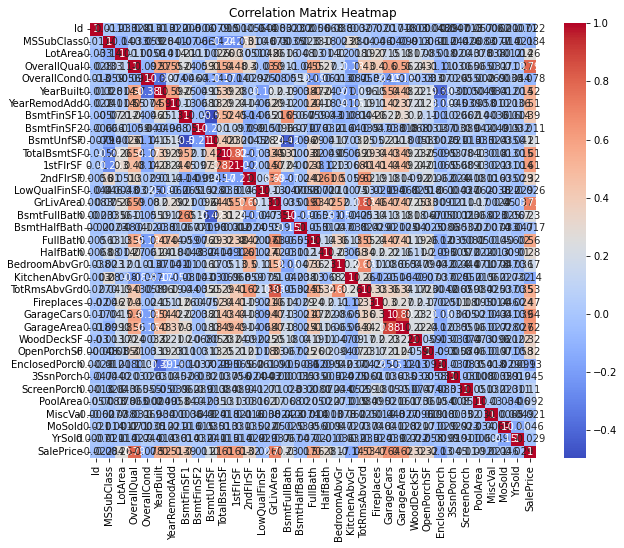

In [43]:
#Analyzing data using Spark

from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
import matplotlib.pyplot as plt
import seaborn as sns

# Create a SparkSession
spark = SparkSession.builder.appName("HousePriceAnalysis").getOrCreate()

# Step 2: Data Loading

train_data = spark.read.csv("train.csv", header=True, inferSchema=True)

#  Data Preprocessing
train_data = train_data.fillna(0)




summary_stats = train_data.describe().toPandas()
print("Summary Statistics:")
print(summary_stats)

# Distribution of 'MSZoning'
mszoning_counts = train_data.groupBy("MSZoning").count().toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(x="MSZoning", y="count", data=mszoning_counts)
plt.title("Distribution of MSZoning")
plt.xlabel("MSZoning")
plt.ylabel("Count")
plt.show()

# Histogram of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_data.select("SalePrice").toPandas(), bins=20, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

# Correlation matrix heatmap
num_features = [col[0] for col in train_data.dtypes if col[1] in ['int', 'double']]
correlation_matrix = train_data.select(num_features).toPandas().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


spark.stop()


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


train_data = pd.read_csv('train.csv')

# Assuming the test dataset file is named "test.csv"
test_data = pd.read_csv('test.csv')

# Step 2: Combine both training and test data for preprocessing and encoding
combined_data = pd.concat([train_data, test_data], axis=0)


# Handle missing data
combined_data = combined_data.fillna(0)  # Fill missing values with 0 for simplicity (you can use more sophisticated imputation)

# Convert all columns to strings to ensure uniform data type for LabelEncoder
combined_data = combined_data.astype(str)


label_encoders = {}
for col in combined_data.select_dtypes(include='object').columns:
    if col != 'SalePrice':
        label_encoders[col] = LabelEncoder()
        combined_data[col] = label_encoders[col].fit_transform(combined_data[col])

#Split the combined data back into training and test sets
X_train = combined_data.iloc[:len(train_data)]
X_test = combined_data.iloc[len(train_data):]


y_train = X_train['SalePrice'].astype(float)
X_train = X_train.drop(columns=['SalePrice'])

#Random Forest Regressor
model = RandomForestRegressor()


model.fit(X_train, y_train)

# Make predictions on the test dataset
predicted_prices = model.predict(X_test.drop(columns=['SalePrice']))


print("Predicted House Prices for the Test Dataset:", predicted_prices)

Predicted House Prices for the Test Dataset: [127666.18 145995.7  171628.76 ... 152747.8  114487.   248706.94]


In [45]:

output_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predicted_prices})


output_df.to_csv('predicted_prices.csv', index=False)